In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
data_df = pd.read_csv('data/case1Data.txt', sep=', ')

# Features
features = list(data_df.columns)
cont_features = [x for x in features if 'x' in x]
cate_features = [c for c in features if 'C' in c]

# Dataframes
cont_df = data_df[cont_features]
cate_df = data_df[cate_features]

data_df

/tmp/ipykernel_29176/3083745273.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_df = pd.read_csv('data/case1Data.txt', sep=', ')


,y,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,x_91,x_92,x_93,x_94,x_95,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,90.685036,NaN,NaN,-3.978178,-1.504027,-14.986790,0.651581,-37.878245,16.213807,-3.965437,...,-7.032047,6.319109,NaN,26.197445,-9.913837,H,H,I,K,J
1,60.844445,26.204958,11.185962,-8.247602,-3.875866,-11.329702,2.637900,-39.617497,NaN,-2.442164,...,-13.437474,NaN,-12.880342,25.924603,-7.015803,K,H,J,G,G
2,18.062345,18.560873,11.355342,-9.370161,-3.745315,-16.292421,-1.831774,-37.584605,14.411348,-2.376175,...,-12.291624,2.664209,-15.803518,24.293073,-14.795709,I,H,G,H,G
3,-8.139839,31.896496,10.069040,-9.484426,-1.512786,-11.421909,-5.649180,-42.830037,18.403197,-7.791762,...,-13.253436,5.004891,-13.879328,25.954304,-9.365574,NaN,H,K,K,G
4,-4.994792,25.400286,NaN,-3.600959,-2.615988,-15.455676,-4.950816,-39.932456,NaN,-7.341165,...,NaN,5.101262,-16.938532,22.611184,-17.240003,G,H,H,K,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.574444,24.821083,14.377228,-7.899269,-5.531786,NaN,-3.732251,NaN,15.752089,NaN,...,-21.322369,4.998234,NaN,NaN,-11.750148,I,H,J,G,G
96,-109.414997,20.848176,9.238049,-11.921478,-6.374971,-18.648810,-3.019048,-41.358696,8.435083,-5.864114,...,NaN,2.597797,-17.732465,20.164049,-15.924279,I,H,K,I,K
97,-11.548116,27.160523,10.134287,-10.920363,-3.231409,-18.474369,-2.431349,-38.280634,21.150995,-2.531643,...,-13.586151,8.293394,-17.020511,23.697288,-10.619427,NaN,H,I,K,J
98,-35.263761,20.391153,10.180320,NaN,-5.296246,-17.612480,-6.472314,-38.292821,12.740686,NaN,...,-16.653055,NaN,-17.575742,22.101534,-18.731196,I,H,K,H,G


# Data Overview

## Missing values

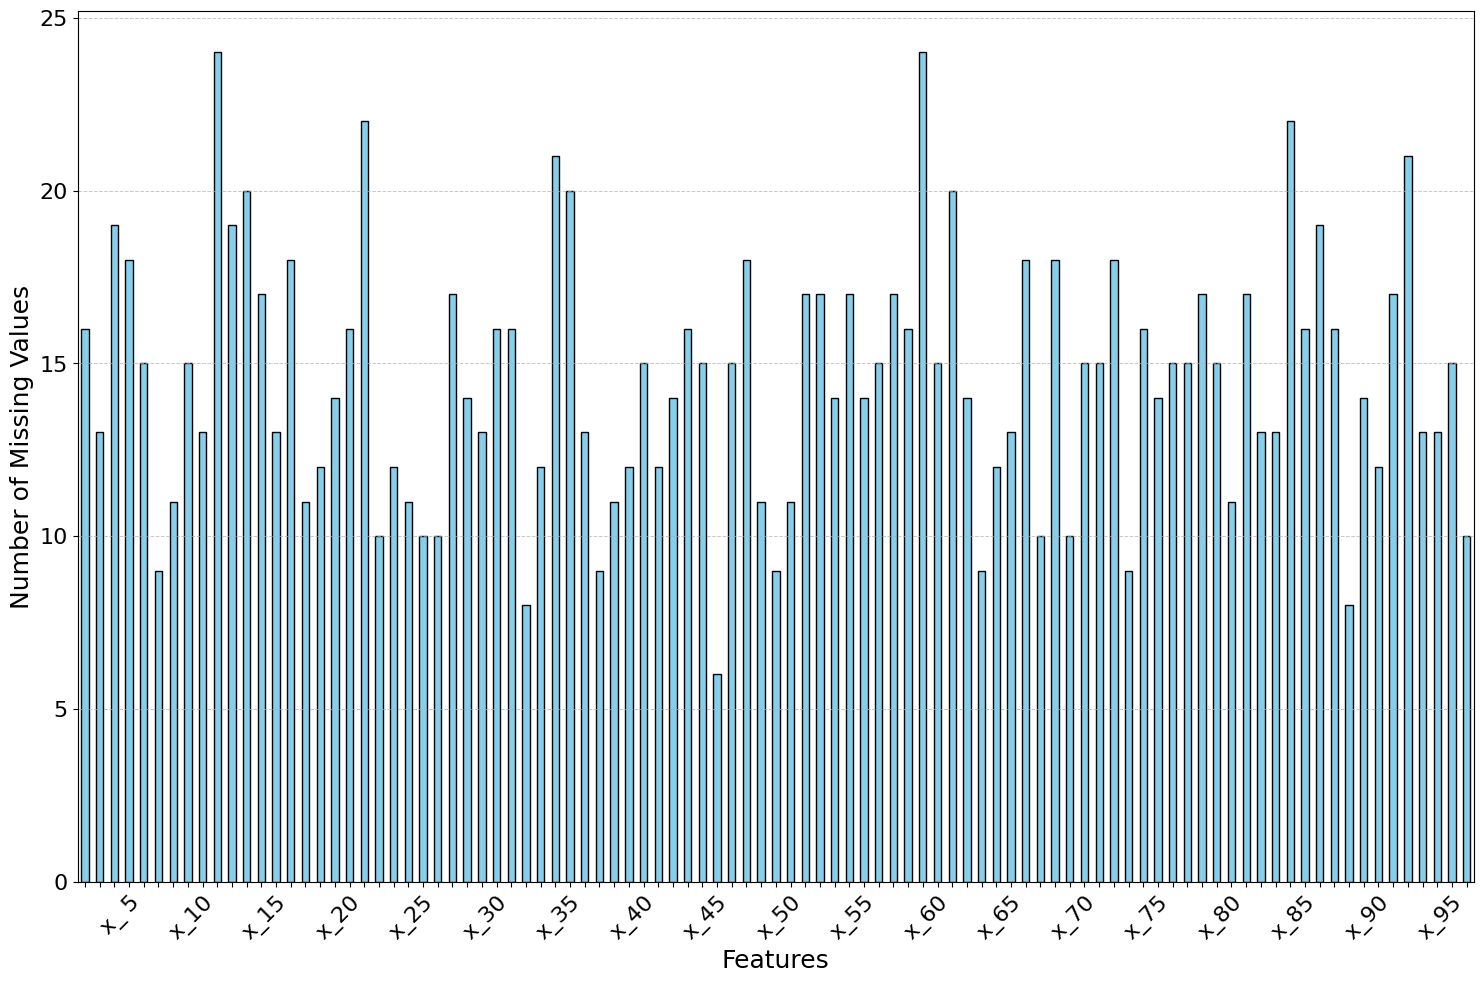

In [110]:
# Assuming 'cont_df' is your DataFrame

# Calculate the number of missing values per feature
missing_values = cont_df.isnull().sum()

# Sort the series by index to ensure the features are in ascending order
missing_values.sort_index(ascending=True, inplace=True)

# Creating the bar plot
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('Number of Missing Values Per Feature')
plt.ylabel('Number of Missing Values', fontsize=18)
plt.xlabel('Features', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Customizing x-ticks to show only every 5th feature name
xticks_labels = [label if int(label.split('_')[-1]) % 5 == 0 else '' for label in missing_values.index]
plt.xticks(ticks=range(len(missing_values)), labels=xticks_labels, rotation=45, ha='right')

# Ensure the layout is tight so the labels are not cut off
plt.tight_layout()

# Add grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Save the plot
plt.savefig("figures/missing_values_per_feature.png")

# Display the plot
plt.show()


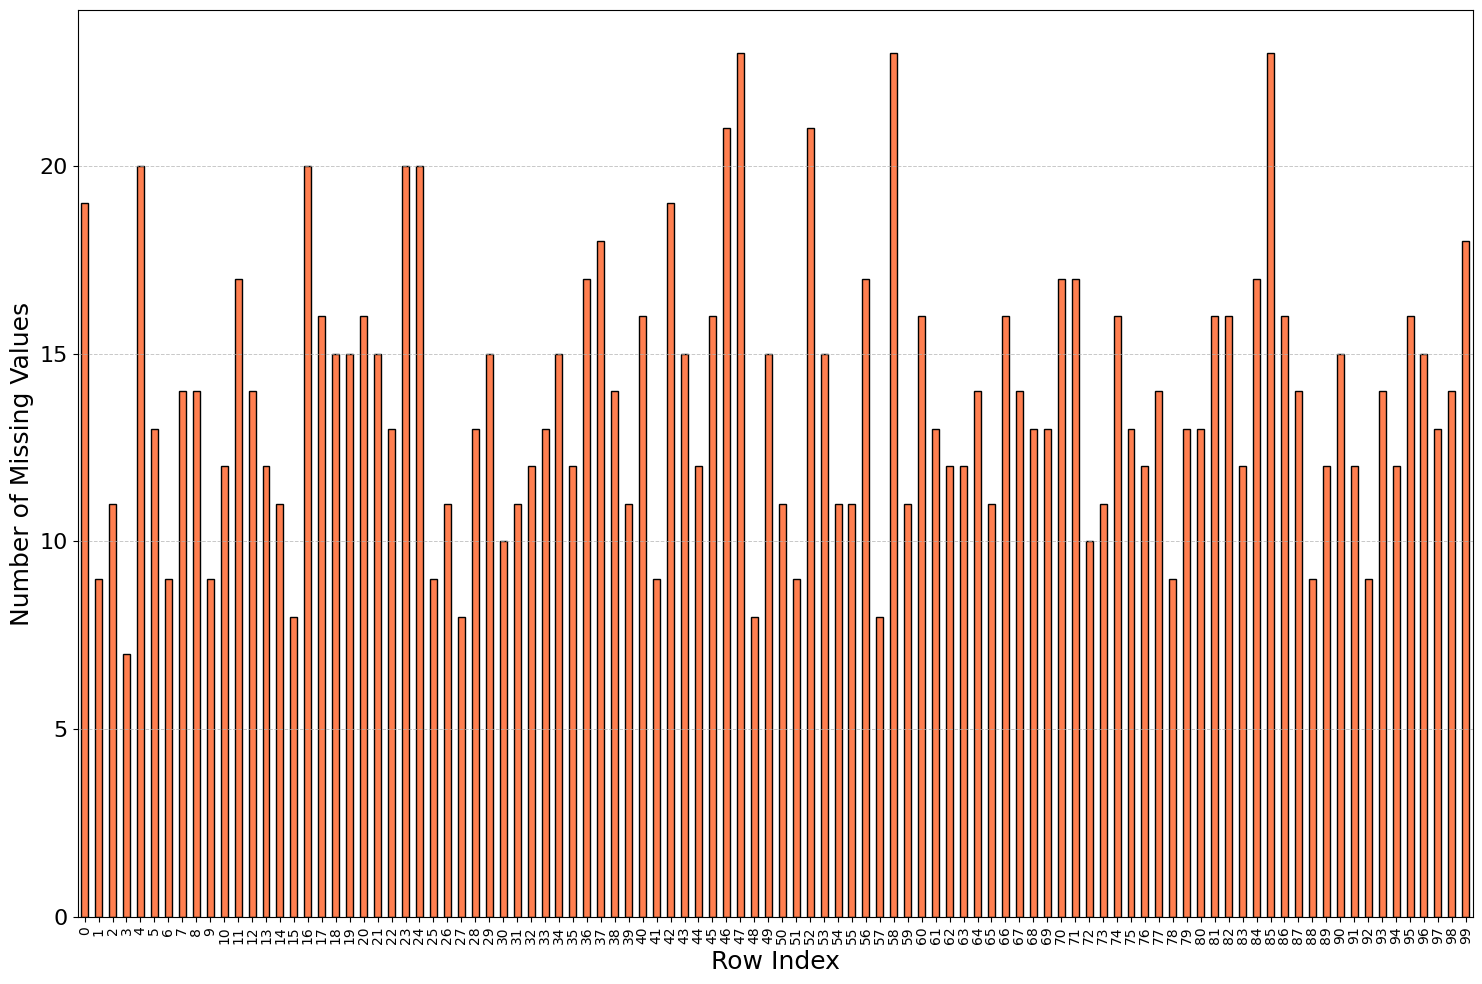

In [111]:
# Calculate the number of missing values per row
missing_values_per_row = cont_df.isnull().sum(axis=1)

# Sort the missing values per row if you want a sorted visualization
# missing_values_per_row.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Create a bar plot for missing values per row. Note: This might not be practical for datasets with a large number of rows.
missing_values_per_row.plot(kind='bar', color='coral', edgecolor='black')
# plt.title('Number of Missing Values Per Row')
plt.ylabel('Number of Missing Values', fontsize=18)
plt.xlabel('Row Index', fontsize=18)

plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
# Due to potentially large number of rows, it might be more insightful to use a histogram or customize the visualization further
plt.tight_layout()

# Add grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Save the plot
plt.savefig("figures/missing_values_per_row.png")

# Display the plot
plt.show()


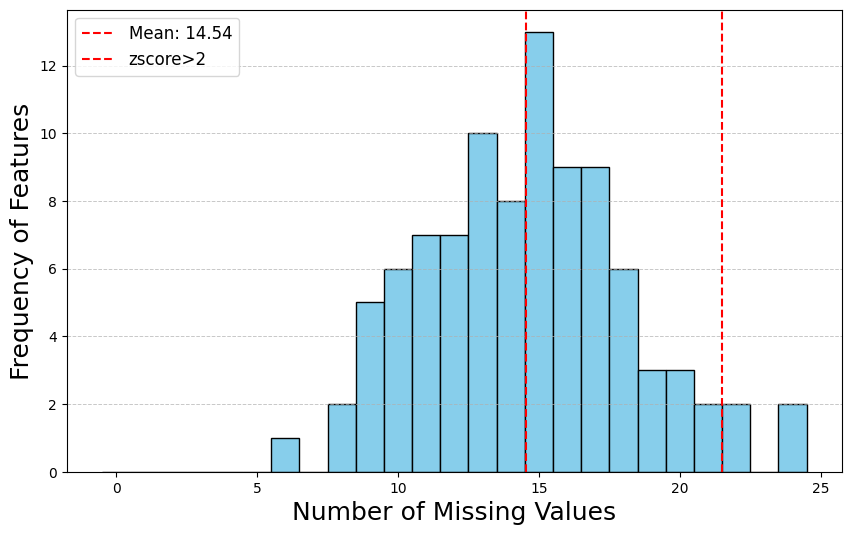

In [112]:
# Assuming missing_values contains the count of missing values per feature
plt.figure(figsize=(10, 6))
plt.hist(missing_values, bins=range(0, missing_values.max() + 2, 1), color='skyblue', edgecolor='black', align='left')

# Mean
mean_miss = missing_values.mean()
plt.axvline(mean_miss, color='r', linestyle='--', label=f'Mean: {mean_miss:.2f}')
plt.axvline(21.5, color='r', linestyle='--', label=f'zscore>2') # for visualization purposes in the report
plt.legend()

# plt.title('Histogram of Missing Values Count per Feature')
plt.xlabel('Number of Missing Values', fontsize=18)
plt.ylabel('Frequency of Features', fontsize=18)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
# Display the histogram
# Save the plot
plt.savefig("figures/histogram_missing_values.png")

plt.show()


In [113]:
# Outliers
z_scores_missing = (missing_values - missing_values.mean()) / missing_values.std()
excl_features =  list(z_scores_missing[z_scores_missing > 2].index)
data_df[excl_features].isna().sum()

x_10    24
x_20    22
x_58    24
x_83    22
dtype: int64

## Correlation

In [114]:
import seaborn as sns

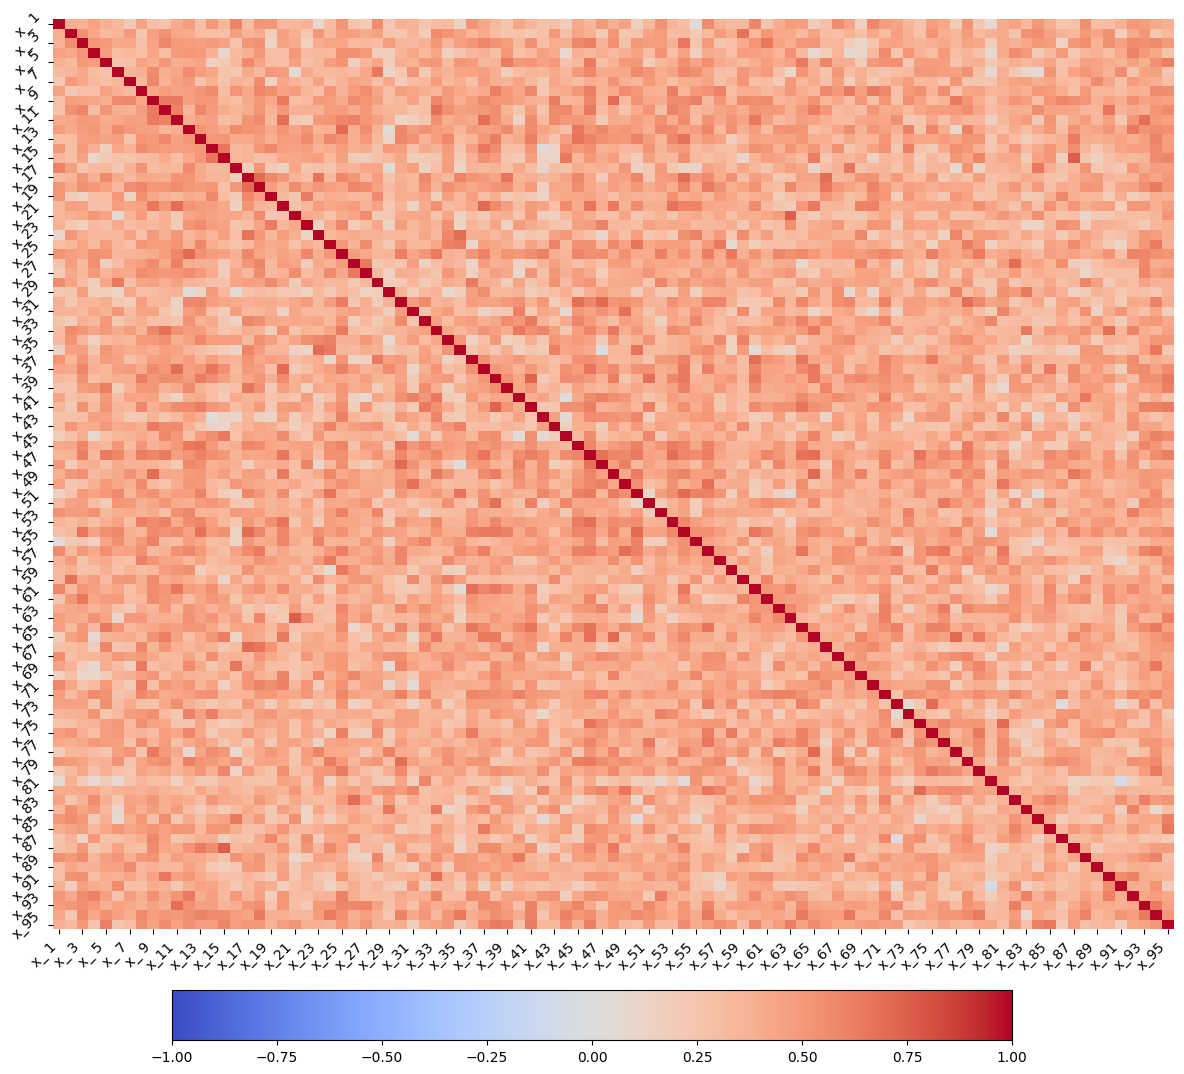

In [115]:
corr = cont_df.corr()

plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, cmap='coolwarm', cbar=False, vmin=-1, vmax=1)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

cbar_ax = plt.gcf().add_axes([0.15, -0.05, 0.7, 0.05])  # Under the figure
# cbar_ax = plt.gcf().add_axes([0.15, 1.05, 0.7, 0.05])  # Above the figure

plt.colorbar(ax.collections[0], cax=cbar_ax, orientation='horizontal')
plt.savefig("figures/correlation_matrix.png")
plt.show()

In [116]:
# Flatten the correlation matrix and reset index
corr_flat = corr.abs().unstack().reset_index()
# Rename columns for clarity
corr_flat.columns = ['Feature1', 'Feature2', 'Correlation']
# Remove self-correlations (where features are the same)
corr_flat = corr_flat[corr_flat['Feature1'] != corr_flat['Feature2']]
# Sort by correlation, descending
corr_sorted = corr_flat.sort_values(by='Correlation', ascending=False)
corr_sorted = corr_sorted[corr_sorted['Feature1'] < corr_sorted['Feature2']]

# Display the top N correlations
N = 10 
print(corr_sorted.head(N))

     Feature1 Feature2  Correlation
1962     x_21     x_63     0.756355
1416     x_15     x_87     0.752131
3555     x_38     x_41     0.736807
2801     x_30     x_47     0.717755
6156     x_65     x_77     0.716798
4529     x_48     x_65     0.712109
1069     x_12     x_25     0.709164
4708     x_50     x_54     0.708067
1841     x_20     x_37     0.707437
7015     x_74     x_81     0.707100


In [117]:
# Print as latex table (may be useful for the report)
latex_str = corr_sorted.head(N).to_latex(index=False, escape=True)
print(latex_str)

\begin{tabular}{llr}
\toprule
Feature1 & Feature2 & Correlation \\
\midrule
x\_21 & x\_63 & 0.756355 \\
x\_15 & x\_87 & 0.752131 \\
x\_38 & x\_41 & 0.736807 \\
x\_30 & x\_47 & 0.717755 \\
x\_65 & x\_77 & 0.716798 \\
x\_48 & x\_65 & 0.712109 \\
x\_12 & x\_25 & 0.709164 \\
x\_50 & x\_54 & 0.708067 \\
x\_20 & x\_37 & 0.707437 \\
x\_74 & x\_81 & 0.707100 \\
\bottomrule
\end{tabular}



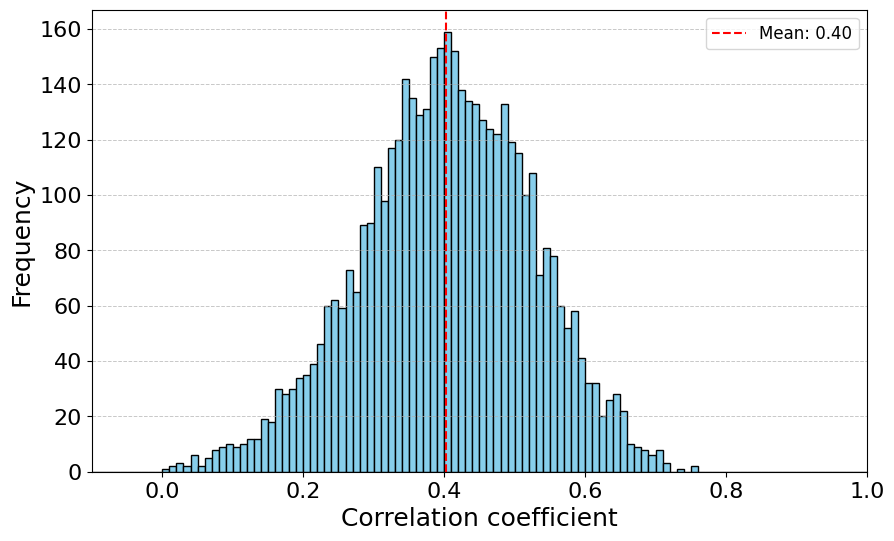

In [118]:
# Flatten the correlation matrix to a Series, remove self-correlation, and take absolute values
corr_values_flat = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack()
bin = 0.01

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(corr_values_flat, bins=np.arange(-1, 1.1, bin), color='skyblue', edgecolor='black')
# plt.title(f'Histogram of Absolute Correlation Coefficients {bin} bin')
plt.xlabel('Correlation coefficient', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

# Correlation mean
mean_corr = corr_values_flat.mean()
plt.axvline(mean_corr, color='r', linestyle='--', label=f'Mean: {mean_corr:.2f}')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-0.1, 1.0)
# Display the histogram
plt.savefig("figures/correlation_coefficients_historgram.png")
plt.show()


# Outliers

In [119]:
from scipy.stats import zscore
from matplotlib.ticker import MaxNLocator

In [120]:
cont_df_filled = cont_df.fillna(cont_df.median())
# Apply Z-score normalization across the DataFrame (axis=0 for column-wise)
z_scores_df = cont_df_filled.apply(zscore)
extreme_values_mask = (z_scores_df.abs() > 3)
# Count occurrences for each feature
extreme_value_counts = extreme_values_mask.sum(axis=0)
# Filter out features with 0 occurrences
extreme_value_counts_filtered = extreme_value_counts[extreme_value_counts > 0]

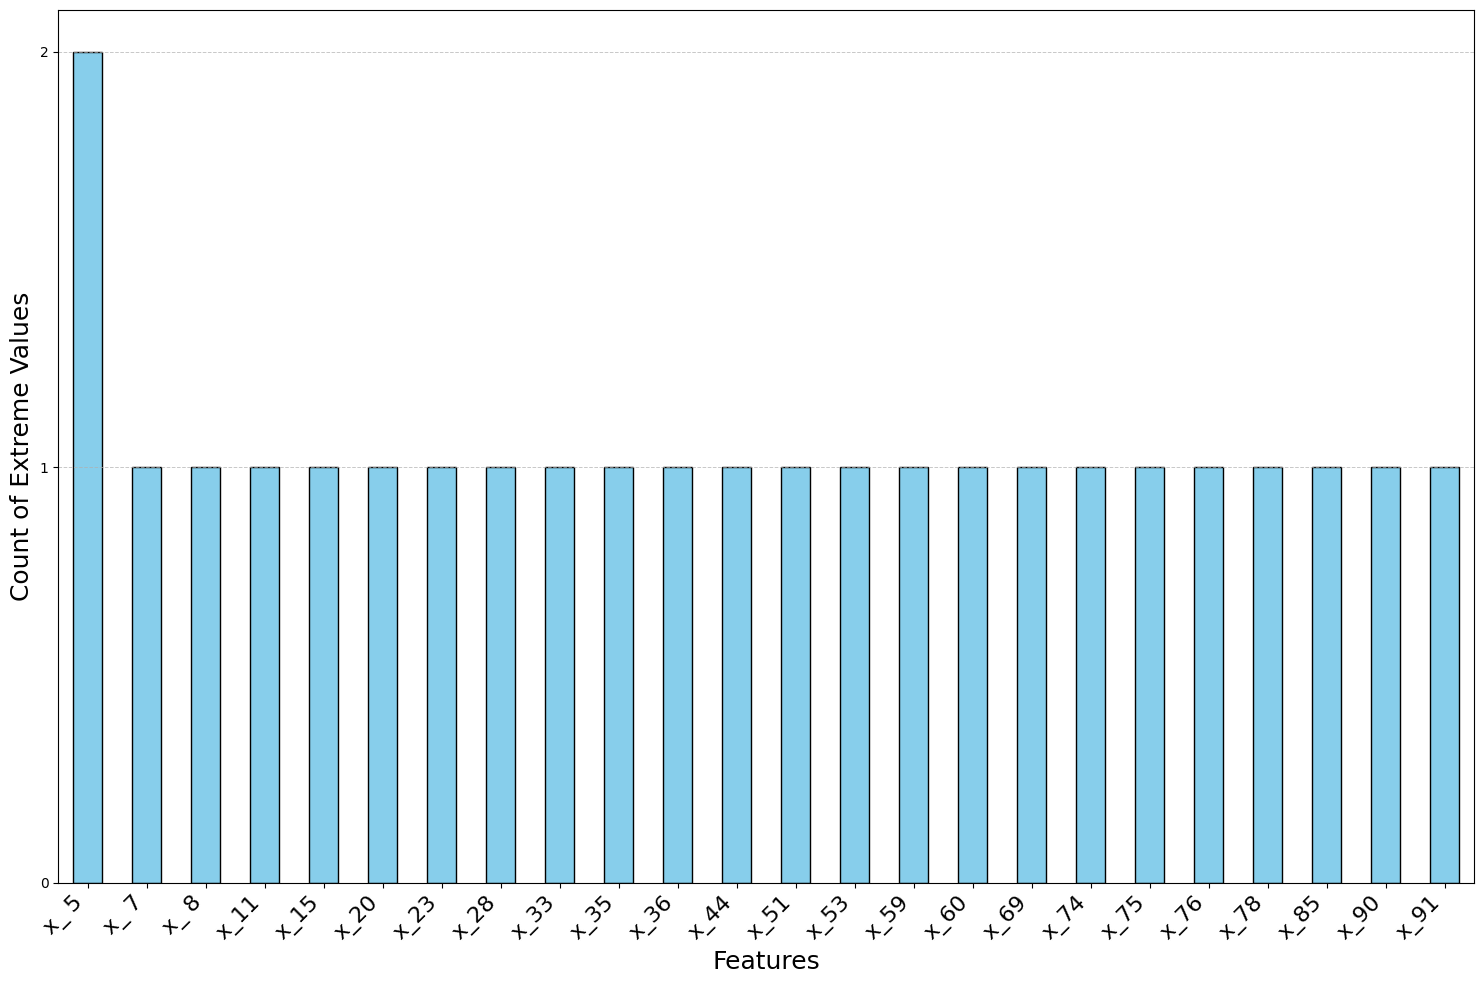

In [121]:
# Creating the bar plot with filtered data
plt.figure(figsize=(15, 10))  # Adjust the size as necessary
ax = extreme_value_counts_filtered.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('Counts of Values with Z-Score > 3 by Feature (Filtered)')
plt.ylabel('Count of Extreme Values', fontsize=18)
plt.xlabel('Features', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)  # Rotate feature names for better readability

# Remove floating point from tics
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Ensure the layout is tight so labels are not cut off
plt.tight_layout()

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.savefig("figures/z_score_bgt_3.png")
# Display 
plt.show()

# Categorical

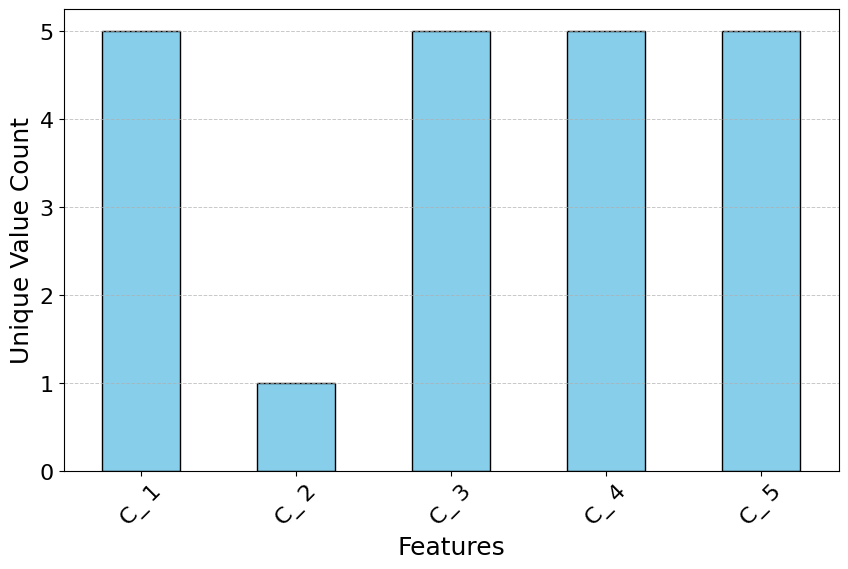

In [122]:
unique_counts = cate_df.nunique()
unique_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.ylabel('Unique Value Count', fontsize=18)
plt.xlabel('Features', fontsize=18)
# plt.title('Unique Value Count for Each Feature')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.savefig("figures/unique_value_count.png")
plt.show()

In [123]:
excl_features.append('C_ 2')

In [124]:
cate_df.isna().sum()

C_ 1    28
C_ 2     0
C_ 3     0
C_ 4     0
C_ 5     0
dtype: int64

In [125]:
excl_features.append('C_ 1')

# Model

## Data

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import mean_squared_error

In [127]:
# Exclude features with many missing values
include_features = [x for x in data_df.columns if x not in excl_features]
filtered_df = data_df[include_features]

cont_features_filtered = [x for x in include_features if 'x' in x]
filtered_df[cont_features_filtered] = filtered_df[cont_features_filtered].fillna(filtered_df[cont_features_filtered].median())
# Fill missing values with the median of the feature

# One hot encoding
cate_features_filtered = [x for x in include_features if 'C' in x]
filtered_df = pd.get_dummies(filtered_df, columns=cate_features_filtered)
dummy_features = [x for x in filtered_df.columns if 'C' in x]
filtered_df[dummy_features] = filtered_df[dummy_features].astype(int)
filtered_df.head(5)

/tmp/ipykernel_29176/1429415276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cont_features_filtered] = filtered_df[cont_features_filtered].fillna(filtered_df[cont_features_filtered].median())


,y,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,C_ 4_G,C_ 4_H,C_ 4_I,C_ 4_J,C_ 4_K,C_ 5_G,C_ 5_H,C_ 5_I,C_ 5_J,C_ 5_K
0,90.685036,24.039863,11.204954,-3.978178,-1.504027,-14.986790,0.651581,-37.878245,16.213807,-3.965437,...,0,0,0,0,1,0,0,0,1,0
1,60.844445,26.204958,11.185962,-8.247602,-3.875866,-11.329702,2.637900,-39.617497,15.739363,-2.442164,...,1,0,0,0,0,1,0,0,0,0
2,18.062345,18.560873,11.355342,-9.370161,-3.745315,-16.292421,-1.831774,-37.584605,14.411348,-2.376175,...,0,1,0,0,0,1,0,0,0,0
3,-8.139839,31.896496,10.069040,-9.484426,-1.512786,-11.421909,-5.649180,-42.830037,18.403197,-7.791762,...,0,0,0,0,1,1,0,0,0,0
4,-4.994792,25.400286,11.204954,-3.600959,-2.615988,-15.455676,-4.950816,-39.932456,15.739363,-7.341165,...,0,0,0,0,1,0,1,0,0,0


In [128]:
# Split to X and Y
X = filtered_df.iloc[:, 1:]  # Feature matrix
y = filtered_df.iloc[:, 0]   # Target variable

# Standarize the continous variables
cont_X_df = X[cont_features_filtered]
scaler = StandardScaler()
cont_X_scaled = scaler.fit_transform(cont_X_df)

# Concatenate final X
X_scaled = np.concatenate([cont_X_scaled, X[dummy_features].to_numpy()], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [129]:
# Make a function for calling the models

def run_elastic_net(X_train, X_test, y_train, y_test, alpha_range, l1_ratio_range, cv_folds=5, scoring_metric='neg_mean_squared_error'):
  # Define the ElasticNet model
  elastic_net = ElasticNet(max_iter=50000, random_state=42)

  # Setup the grid search parameters
  param_grid = {
      'alpha': alpha_range,    # Regularization strength
      'l1_ratio': l1_range,    # Mix between L1 and L2 regularization
  }

  # Initialize GridSearchCV
  grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=cv_folds, scoring='neg_mean_squared_error')

  # Suppress convergence warnings
  with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      
      # Fit the model
      grid_search.fit(X_train, y_train)

  # Extract best parameters and score
  best_params = grid_search.best_params_
  best_score = grid_search.best_score_

  # Use the best estimator to make predictions on the test set
  y_pred = grid_search.predict(X_test)

  # Calculate the test mean squared error
  test_mse = mean_squared_error(y_test, y_pred)

  return grid_search, test_mse

In [130]:
# First Search

alpha_range = np.logspace(0, 100, 200)  # Regularization strength
l1_range = np.linspace(0.1, 0.8, 20)    # Mix between L1 and L2 regularization

In [131]:
# Second Search(narrow)

# Define a narrower range centered around the best broad results
alpha_range_narrow = np.linspace(0.1, 2, 200)
l1_ratio_range_narrow = np.linspace(0.7, 0.9, 20)

In [132]:
# No PCA
grid_search, mse = run_elastic_net(X_train, X_test, y_train, y_test, alpha_range, l1_range)
print("Basic ElasticNet model (no PCA)")
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test MSE:", mse)

cv_results = grid_search.cv_results_
# for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
#     print("MSE:", -mean_score, "for", params)

Basic ElasticNet model (no PCA)
Best parameters found: {'alpha': 1.0, 'l1_ratio': 0.8}
Best score found: -892.6515337499601
Test MSE: 591.0534099679819


In [133]:
grid_search_narrow, mse_narrow = run_elastic_net(X_train, X_test, y_train, y_test, alpha_range_narrow, l1_ratio_range_narrow)
print("Basic ElasticNet model (no PCA) - narrow search")
print("Best parameters found:", grid_search_narrow.best_params_)
print("Best score found:", grid_search_narrow.best_score_)
print("Test MSE:", mse_narrow)

cv_results = grid_search_narrow.cv_results_
# for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
#     print("MSE:", -mean_score, "for", params)

Basic ElasticNet model (no PCA) - narrow search
Best parameters found: {'alpha': 0.6728643216080401, 'l1_ratio': 0.8}
Best score found: -876.1408683944053
Test MSE: 536.240260813885


In [134]:
# Best model fit with all data
# PCA models performed worse
# Compare all the models to find the one with the best_alpha_broad and best_l1_ratio_broad
# grid_search, grid_search_narrow, grid_search_pca, grid_search_pca_narrow
scores = {
  'grid_search': grid_search.best_score_,
  'grid_search_narrow': grid_search_narrow.best_score_
}

best_model_name = max(scores, key=scores.get)
best_score = scores[best_model_name]

print(f"Best score {best_score} found at model: {best_model_name}")


Best score -876.1408683944053 found at model: grid_search_narrow


In [135]:
best_alpha_broad = grid_search_narrow.best_params_['alpha']
best_l1_ratio_broad = grid_search_narrow.best_params_['l1_ratio']
best_model = ElasticNet(alpha=best_alpha_broad, l1_ratio=best_l1_ratio_broad)
best_model.fit(X_scaled, y)

y_pred = best_model.predict(X_scaled)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error
print("Test MSE: ", mean_squared_error(y, y_pred))

Test MSE:  229.2204444384103


In [136]:
# Coefficents
coefficients = best_model.coef_
intercept = best_model.intercept_

columns = ["intercept"] + list(X.columns)
data = [[intercept] + list(coefficients)]
coef_df = pd.DataFrame(data=data, columns=columns)

print("Dropped to zero:", coef_df.loc[:, (coef_df == 0).any(axis=0)].shape[1])
coef_df.loc[:, (coef_df != 0).any(axis=0)]

Dropped to zero: 37


,intercept,x_ 1,x_ 2,x_ 3,x_ 6,x_ 8,x_11,x_13,x_14,x_15,...,x_89,x_90,x_91,x_93,x_94,x_95,C_ 3_G,C_ 4_K,C_ 5_H,C_ 5_I
0,-9.503841,-1.921831,1.571058,7.085273,-0.207291,-4.33939,-0.092269,3.994924,-0.009978,3.6507,...,-0.245711,-0.355496,2.090127,1.436923,0.576844,3.485393,1.230963,-0.77622,0.372014,-0.336817


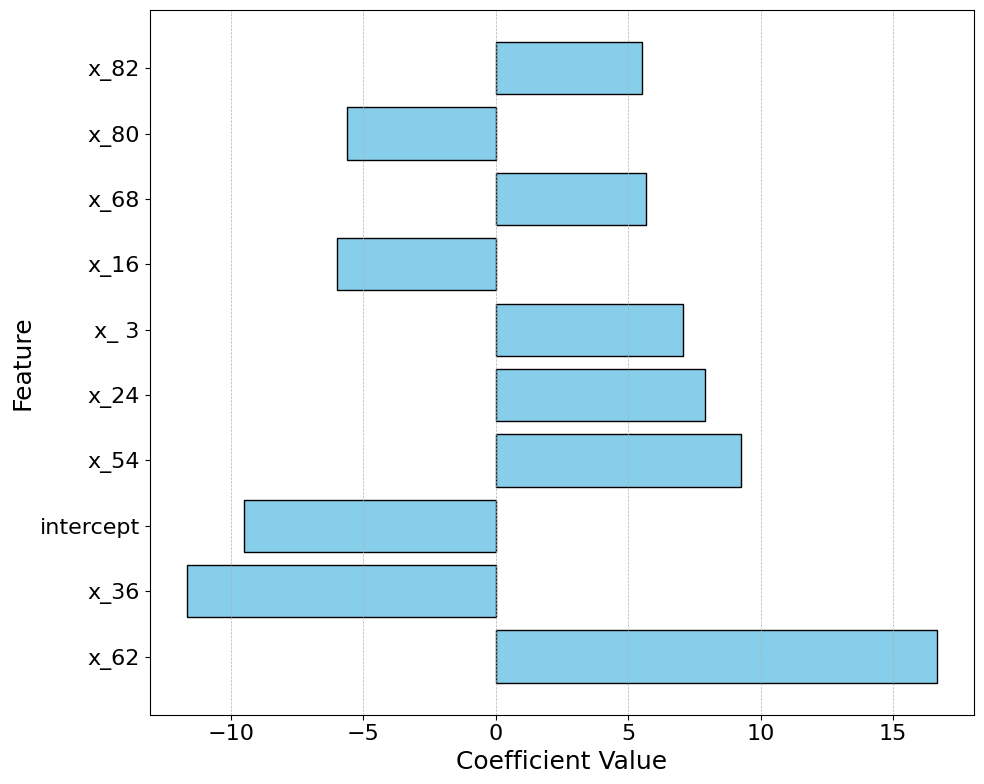

In [137]:
import matplotlib.pyplot as plt
import pandas as pd

# Increase default font sizes
plt.rcParams.update({'font.size': 12})  # Adjust the base font size
plt.rcParams.update({'axes.titlesize': 14})  # Title font size
plt.rcParams.update({'axes.labelsize': 12})  # Axis labels font size
plt.rcParams.update({'xtick.labelsize': 10})  # X tick labels font size
plt.rcParams.update({'ytick.labelsize': 10})  # Y tick labels font size

# Assuming 'best_model' is already defined as the best model from your search
# and 'X.columns' contains the feature names

# Coefficients and Intercept from the best model
coefficients = best_model.coef_
intercept = best_model.intercept_

# Preparing the DataFrame for plotting
columns = ["Feature", "Coefficient"]
data = [["intercept", intercept]] + list(zip(X.columns, coefficients))
coef_df = pd.DataFrame(data=data, columns=columns)

# Sorting by absolute coefficient values and selecting top 10
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df_top10 = coef_df.sort_values(by='AbsCoefficient', ascending=False).head(10)

# Plotting top 10 coefficients
plt.figure(figsize=(10, 8))
plt.barh(coef_df_top10["Feature"], coef_df_top10["Coefficient"], color='skyblue', edgecolor='black')
plt.xlabel("Coefficient Value", fontsize=18)
plt.ylabel("Feature", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title("Top 10 ElasticNet Model Coefficients", fontsize=14)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', axis='x')  # Enable grid lines only on y-axis
plt.tight_layout()
plt.savefig("figures/top10_coefficients_elasticnet.png")
plt.show()


# Expected

## RMSE

In [140]:
# Bootstrap
num_samples = 10000

samples_mse = []
for _ in range(num_samples):
    # Sample
    sample_df = filtered_df.sample(n=len(filtered_df), replace=True, random_state=np.random.randint(0, 10000))

    # Split to X and Y
    X = sample_df.iloc[:, 1:]  # Feature matrix
    y = sample_df.iloc[:, 0]   # Target variable

    # Standarize the continous variables
    cont_X_df = X[cont_features_filtered]
    scaler = StandardScaler()
    cont_X_scaled = scaler.fit_transform(cont_X_df)

    # Concatenate final X
    X_scaled = np.concatenate([cont_X_scaled, X[dummy_features].to_numpy()], axis=1)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Fit and predict
    s_model = ElasticNet(alpha=best_alpha_broad, l1_ratio=best_l1_ratio_broad)
    s_model.fit(X_train, y_train)
    y_pred = s_model.predict(X_test)

    # Evaluate the performance of the model
    from sklearn.metrics import mean_squared_error
    mse_error = mean_squared_error(y_test, y_pred)
    print("Test MSE: ", mse_error)
    samples_mse.append(mse_error)



Test MSE:  783.4349257305844
Test MSE:  366.32695602734435
Test MSE:  570.0881953817217
Test MSE:  206.91041304815184
Test MSE:  524.1642792299815
Test MSE:  290.47151070272014
Test MSE:  498.12765485351855
Test MSE:  364.3416003967225
Test MSE:  232.27297326175625
Test MSE:  279.4211101538538
Test MSE:  587.7401167522208
Test MSE:  370.13216758522606
Test MSE:  373.4013937119752
Test MSE:  622.0027776106771
Test MSE:  423.31938332679954
Test MSE:  169.76412506917177
Test MSE:  290.1223387548663
Test MSE:  471.61172566038357
Test MSE:  503.9922626662345
Test MSE:  878.2933624497066
Test MSE:  733.8574605637571
Test MSE:  402.27901632982383
Test MSE:  678.4608420040314
Test MSE:  773.6966038783007
Test MSE:  784.7461327452927
Test MSE:  729.5861861589907
Test MSE:  201.25898469623252
Test MSE:  465.3825012165809
Test MSE:  732.9506786795047
Test MSE:  355.5926132457786
Test MSE:  649.0421872563587
Test MSE:  302.3793783705355
Test MSE:  132.40449531381753
Test MSE:  808.9354786037744
Te

In [141]:
RMSE_value = np.mean(rmse_values)
print(f"Mean MSE: {RMSE_value}")

Mean MSE: 21.547563174327657


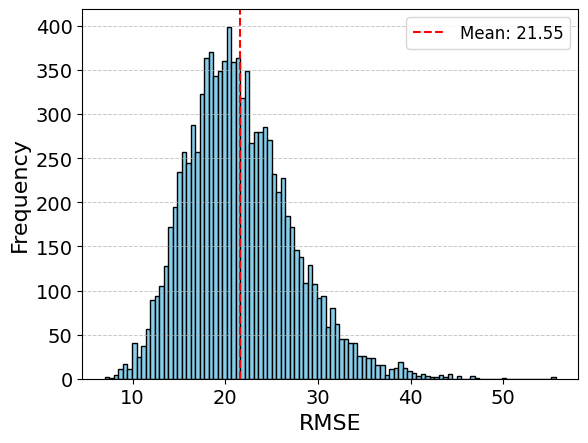

In [ ]:
# Calculate RMSE values
rmse_values = np.sqrt(samples_mse)

# Plotting the histogram of RMSE values
plt.hist(rmse_values, bins=100, edgecolor='black', color='skyblue')
plt.axvline(np.mean(rmse_values), color='r', linestyle='--', label=f'Mean: {np.mean(rmse_values):.2f}')
plt.legend()

# plt.title('Histogram of RMSE Values')
plt.xlabel('RMSE', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.savefig("figures/rmse_histogram_values.png")
plt.show()

In [ ]:
# Exclude features with many missing values
include_features = [x for x in data_df.columns if x not in excl_features]
filtered_df = data_df[include_features]

# Fill missing values with the median of the feature
cont_features_filtered = [x for x in include_features if 'x' in x]
filtered_df[cont_features_filtered] = filtered_df[cont_features_filtered].fillna(filtered_df[cont_features_filtered].median())

# One hot encoding
cate_features_filtered = [x for x in include_features if 'C' in x]
filtered_df = pd.get_dummies(filtered_df, columns=cate_features_filtered)
dummy_features = [x for x in filtered_df.columns if 'C' in x]
filtered_df[dummy_features] = filtered_df[dummy_features].astype(int)
filtered_df.head(5)

/tmp/ipykernel_29176/2600573492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cont_features_filtered] = filtered_df[cont_features_filtered].fillna(filtered_df[cont_features_filtered].median())


,y,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,C_ 4_G,C_ 4_H,C_ 4_I,C_ 4_J,C_ 4_K,C_ 5_G,C_ 5_H,C_ 5_I,C_ 5_J,C_ 5_K
0,90.685036,24.039863,11.204954,-3.978178,-1.504027,-14.986790,0.651581,-37.878245,16.213807,-3.965437,...,0,0,0,0,1,0,0,0,1,0
1,60.844445,26.204958,11.185962,-8.247602,-3.875866,-11.329702,2.637900,-39.617497,15.739363,-2.442164,...,1,0,0,0,0,1,0,0,0,0
2,18.062345,18.560873,11.355342,-9.370161,-3.745315,-16.292421,-1.831774,-37.584605,14.411348,-2.376175,...,0,1,0,0,0,1,0,0,0,0
3,-8.139839,31.896496,10.069040,-9.484426,-1.512786,-11.421909,-5.649180,-42.830037,18.403197,-7.791762,...,0,0,0,0,1,1,0,0,0,0
4,-4.994792,25.400286,11.204954,-3.600959,-2.615988,-15.455676,-4.950816,-39.932456,15.739363,-7.341165,...,0,0,0,0,1,0,1,0,0,0


## ynew predictions

In [ ]:
# Old
include_features = [x for x in data_df.columns if x not in (excl_features+['y'])]
data_df_old = data_df[include_features]
data_df_old["new"] = 0

# New
data_df_new = pd.read_csv('data/case1Data_Xnew.txt', sep=', ')
data_df_new = data_df_new[include_features]
data_df_new["new"] = 1

# Combine
data_df_all = pd.concat([data_df_old, data_df_new], axis=0)
data_df_all

/tmp/ipykernel_29176/3087953369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_old["new"] = 0
/tmp/ipykernel_29176/3087953369.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_df_new = pd.read_csv('data/case1Data_Xnew.txt', sep=', ')


,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_11,...,x_90,x_91,x_92,x_93,x_94,x_95,C_ 3,C_ 4,C_ 5,new
0,NaN,NaN,-3.978178,-1.504027,-14.986790,0.651581,-37.878245,16.213807,-3.965437,NaN,...,-1.973244,-7.032047,6.319109,NaN,26.197445,-9.913837,I,K,J,0
1,26.204958,11.185962,-8.247602,-3.875866,-11.329702,2.637900,-39.617497,NaN,-2.442164,NaN,...,-10.123605,-13.437474,NaN,-12.880342,25.924603,-7.015803,J,G,G,0
2,18.560873,11.355342,-9.370161,-3.745315,-16.292421,-1.831774,-37.584605,14.411348,-2.376175,NaN,...,-8.448317,-12.291624,2.664209,-15.803518,24.293073,-14.795709,G,H,G,0
3,31.896496,10.069040,-9.484426,-1.512786,-11.421909,-5.649180,-42.830037,18.403197,-7.791762,1.002245,...,-6.712958,-13.253436,5.004891,-13.879328,25.954304,-9.365574,K,K,G,0
4,25.400286,NaN,-3.600959,-2.615988,-15.455676,-4.950816,-39.932456,NaN,-7.341165,-2.596163,...,-5.815218,NaN,5.101262,-16.938532,22.611184,-17.240003,H,K,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23.788728,12.765182,-8.555241,-7.618562,-17.834893,-5.043538,NaN,13.629996,-10.243261,NaN,...,-9.502929,-17.276540,0.624142,-17.922724,25.140772,-14.043135,H,I,NaN,1
996,24.513299,10.928531,NaN,-4.955177,-16.294644,-2.795876,-38.769834,15.696215,NaN,-2.210167,...,-7.623828,-11.794883,NaN,-18.231176,22.298548,NaN,NaN,G,G,1
997,24.825600,NaN,NaN,NaN,-16.955886,-4.219429,-37.992350,12.438173,-5.559265,0.357507,...,-10.911733,NaN,4.515739,-16.911184,21.434860,-10.914019,H,H,J,1
998,21.086713,8.985050,NaN,-4.319555,-11.610023,-6.426238,-39.367529,13.258821,NaN,NaN,...,NaN,-16.554836,3.941410,-16.451265,24.173953,-9.117348,G,G,G,1


In [ ]:
# Preprocessing

# Fill missing values with the median of the feature
cont_features_filtered = [x for x in include_features if 'x' in x]
data_df_all[cont_features_filtered] = data_df_all[cont_features_filtered].fillna(data_df_all[cont_features_filtered].median())

# One hot encoding
cate_features_filtered = [x for x in include_features if 'C' in x]
data_df_all = pd.get_dummies(data_df_all, columns=cate_features_filtered)
dummy_features = [x for x in data_df_all.columns if 'C' in x]
data_df_all[dummy_features] = data_df_all[dummy_features].astype(int)
data_df_all.head(5)

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_11,...,C_ 4_G,C_ 4_H,C_ 4_I,C_ 4_J,C_ 4_K,C_ 5_G,C_ 5_H,C_ 5_I,C_ 5_J,C_ 5_K
0,24.162838,11.279442,-3.978178,-1.504027,-14.986790,0.651581,-37.878245,16.213807,-3.965437,-0.387102,...,0,0,0,0,1,0,0,0,1,0
1,26.204958,11.185962,-8.247602,-3.875866,-11.329702,2.637900,-39.617497,15.680163,-2.442164,-0.387102,...,1,0,0,0,0,1,0,0,0,0
2,18.560873,11.355342,-9.370161,-3.745315,-16.292421,-1.831774,-37.584605,14.411348,-2.376175,-0.387102,...,0,1,0,0,0,1,0,0,0,0
3,31.896496,10.069040,-9.484426,-1.512786,-11.421909,-5.649180,-42.830037,18.403197,-7.791762,1.002245,...,0,0,0,0,1,1,0,0,0,0
4,25.400286,11.279442,-3.600959,-2.615988,-15.455676,-4.950816,-39.932456,15.680163,-7.341165,-2.596163,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Standarize the continous variables
cont_X_df_all = data_df_all[cont_features_filtered]
scaler = StandardScaler()
cont_X_scaled_all = scaler.fit_transform(cont_X_df_all)

# Concatenate final X
X_scaled_all = np.concatenate([cont_X_scaled_all, data_df_all[dummy_features].to_numpy()], axis=1)
X_scaled_all.shape

(1100, 106)

In [ ]:
cont_X_df_all = data_df_all[cont_features_filtered]
scaler = StandardScaler()
cont_X_scaled_all = scaler.fit_transform(cont_X_df_all)

# Update the original DataFrame with the scaled values
scaled_df_all = data_df_all.copy()
cont_X_scaled_df = pd.DataFrame(cont_X_scaled_all, columns=cont_features_filtered)
scaled_df_all[cont_features_filtered] = cont_X_scaled_df
scaled_df_all

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_11,...,C_ 4_G,C_ 4_H,C_ 4_I,C_ 4_J,C_ 4_K,C_ 5_G,C_ 5_H,C_ 5_I,C_ 5_J,C_ 5_K
0,-0.020015,-0.006328,2.452403,1.002830,0.444444,1.286187,0.442291,0.204296,0.344997,-0.024519,...,0,0,0,0,1,0,0,0,1,0
1,0.712586,-0.044378,0.771751,0.088117,1.875990,2.025277,-0.270194,0.011269,0.908145,-0.024519,...,1,0,0,0,0,1,0,0,0,0
2,-2.029691,0.024567,0.329858,0.138465,-0.066638,0.362155,0.562581,-0.447679,0.932541,-0.024519,...,0,1,0,0,0,1,0,0,0,0
3,2.754396,-0.499008,0.284878,0.999452,1.839896,-1.058264,-1.586213,0.996228,-1.069580,0.499728,...,0,0,0,0,1,1,0,0,0,0
4,0.423914,-0.006328,2.600894,0.573996,0.260901,-0.798410,-0.399217,0.011269,-0.902996,-0.858071,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.182749,1.679332,0.610263,0.054349,0.016390,0.021063,-0.732150,-0.149969,-2.456784,-0.196734,...,0,0,1,0,0,0,0,0,0,0
996,0.619773,0.256894,-0.291071,0.115870,-0.172319,1.332075,-0.398793,0.425112,0.027343,1.296784,...,1,0,0,0,0,1,0,0,0,0
997,-2.381506,-1.866490,-2.885481,-2.164406,-2.073232,0.021063,-1.583245,0.011269,-2.397223,-1.656329,...,0,1,0,0,0,0,0,0,1,0
998,0.758651,-0.365038,2.134020,-0.384812,1.563296,1.019187,0.283496,0.011269,0.519918,1.087120,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
# Get only the new data
x_new = scaled_df_all[scaled_df_all["new"] == 1].drop(columns="new").to_numpy()
y_pred_new = best_model.predict(x_new)
y_pred_new

array([ 8.73780242e+01,  4.31778708e+01,  9.10062513e+00, -1.25000923e+01,
       -4.24927720e+00, -9.03705985e+01, -5.56134536e+01,  4.26596528e+01,
       -5.07353213e+01,  2.87708977e+01, -4.00212782e+01, -3.80574343e+01,
       -3.88814813e+01, -1.67650636e+01,  7.60440807e+01,  5.10003647e+01,
        2.93529903e+01, -1.16532361e+00, -6.83758253e+01,  1.75031098e+01,
        2.80886389e+01, -1.30264959e+02, -4.20296413e+01,  5.00914727e+01,
       -7.96257021e+01,  2.93674573e+01,  2.73201045e+01, -1.86447704e+01,
        1.44546323e+01, -1.45375075e+01,  1.60220433e+01, -4.26377957e+01,
       -2.19430613e+01,  5.94940382e+01,  2.69291295e+01, -2.37805341e+01,
        6.51471413e+00, -2.77138487e+01, -6.01996778e+01,  1.13282913e+01,
        7.84328585e+00, -1.22873856e+00,  4.48400074e+00,  6.84202708e+00,
       -7.58944242e+01,  2.18644594e+01, -7.74979645e+01, -1.25792489e+01,
        4.85968094e+00,  1.18828038e+01, -1.43107989e+01, -2.04263123e+01,
        2.33412249e+01,  

In [ ]:
# Assuming 'data_df_all' includes both old and new data, and 'best_model' is already trained on scaled old data

# data_df_old = data_df_all[data_df_all["new"] == 0]
# data_df_new = data_df_all[data_df_all["new"] == 1]

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on continuous features of the old data
# scaler.fit(data_df_old[cont_features_filtered])

# # Transform the continuous features in both old and new data
# data_df_old_scaled = scaler.transform(data_df_old[cont_features_filtered])
# data_df_new_scaled = scaler.transform(data_df_new[cont_features_filtered])

# # Update the original dataframes with the scaled values for continuous features
# data_df_old[cont_features_filtered] = data_df_old_scaled
# data_df_new[cont_features_filtered] = data_df_new_scaled

# # Drop the 'new' column and convert to numpy array for model input
# x_new = data_df_new.drop(columns="new").to_numpy()

# y_pred_new = best_model.predict(x_new)

# data_df_new["predicted_y"] = y_pred_new

# y_pred_new

In [143]:
# Write y_pred to a file
np.savetxt('output/predictions_s230284s233091.txt', y_pred_new, delimiter=',')
# Save RMSE (single value) to a file
with open('output/s230284s233091_RMSE.txt', 'w') as f:
    f.write(str(RMSE_value))
    